In [53]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ConcordanceIndex


In [45]:
# Specify column names
columns = ['ID', 'Entity', 'Sentiment', 'Sentence']

# Read the CSV into a DataFrame with headers
df = pd.read_csv("twitter_training.csv", header=None, names=columns)

df.head()

,ID,Entity,Sentiment,Sentence
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Sentence   73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## Text Preprocessing:

In [47]:
# Assuming 'df' is your DataFrame with the 'Sentence' and 'Sentiment' columns
df['Sentence'] = df['Sentence'].astype(str)  # Ensure that the 'Sentence' column is of string type

# Define a function for text processing
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Sentence' column
df['Sentence'] = df['Sentence'].apply(preprocess_text)

## Word Frequency Analysis:

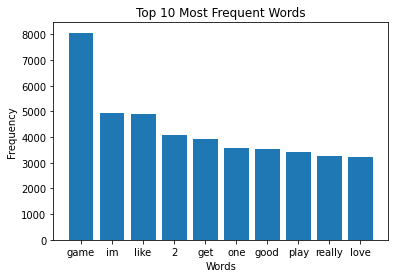

In [48]:
# Assuming 'df' is your DataFrame with the 'Sentence' column
words = ' '.join(df['Sentence']).lower().split()
word_counts = Counter(words)

# Plotting the top 10 most frequent words
top_words = word_counts.most_common(10)
plt.bar(*zip(*top_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()


In [49]:
# Most Common words in Sentence
df['temp_list'] = df['Sentence'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,8062
1,im,4942
2,like,4880
3,2,4070
4,get,3941
5,one,3584
6,good,3550
7,play,3413
8,really,3260
9,love,3239


## Sentiment Distribution:

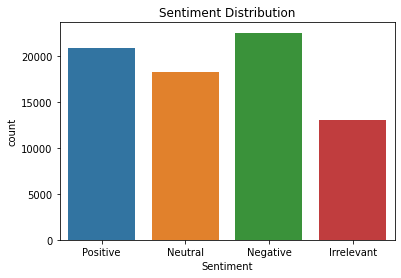

In [50]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [51]:
# the distribution of tweets in the train set
temp = df.groupby('Sentiment').count()['Sentence'].reset_index().sort_values(by='Sentence',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiment,Sentence
1,Negative,22542
3,Positive,20832
2,Neutral,18318
0,Irrelevant,12990


## Concordance Analysis:

In [52]:

# Assuming 'df' is your DataFrame with the 'Sentence' column
words = ' '.join(df['Sentence']).lower().split()
concordance_index = ConcordanceIndex(words)

# Displaying concordances for a specific word (e.g., 'positive')
concordance_index.print_concordance('positive', width=40, lines=5)


Displaying 5 of 72 matches:
maps good great positive sign things com
massive exactly positive impact worlds e
massive exactly positive impact worlds e
s huge entirely positive impact environm
astrous exactly positive impact onto wor


## Topic Modeling:

In [54]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Sentence'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda_model.fit_transform(X)



In [55]:
# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: game, play, cant, im, get, rhandlerr, like, shit, please, fix
Topic 2: battlefield, player, see, ban, time, access, care, health, first, unk
Topic 3: johnson, home, google, depot, love, us, call, baby, best, fun
Topic 4: dead, red, xbox, im, like, amazon, redemption, series, new, love
Topic 5: verizon, good, like, would, one, get, im, italy, back, time


## Word Clouds:

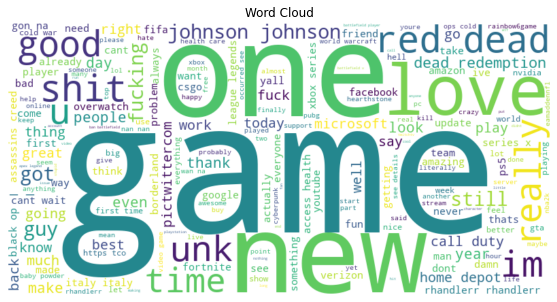

In [56]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Sentence']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


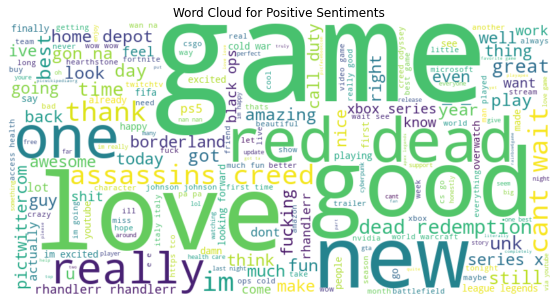

In [57]:
positive_sentences = ' '.join(df[df['Sentiment'] == 'Positive']['Sentence'])
negative_sentences = ' '.join(df[df['Sentiment'] == 'Negative']['Sentence'])

# Word Cloud for Positive Sentiments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_sentences)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()



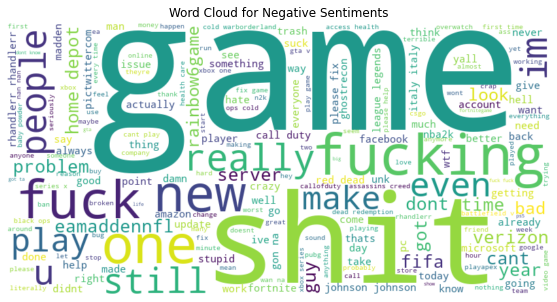

In [58]:
# Word Cloud for Negative Sentiments
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_sentences)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

## Comparison Analysis:

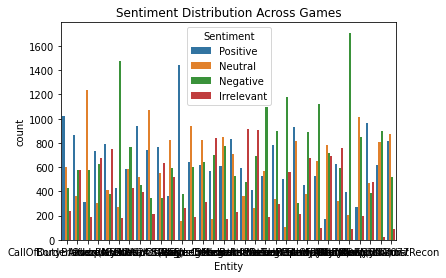

In [59]:
# Assuming 'df' is your DataFrame with the 'Sentiment' and 'Game' columns
sns.countplot(x='Entity', hue='Sentiment', data=df)
plt.title('Sentiment Distribution Across Games')
plt.show()


## the most repeated entity in your dataset

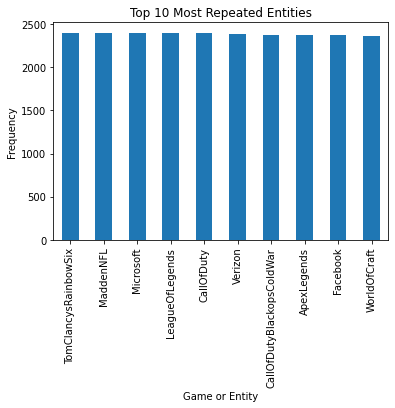

In [60]:

game_counts = df['Entity'].value_counts()

# Plotting the top 10 most repeated games or entities
top_games = game_counts.head(10)
top_games.plot(kind='bar')
plt.xlabel('Game or Entity')
plt.ylabel('Frequency')
plt.title('Top 10 Most Repeated Entities')
plt.show()


## the most repeated entity and the most sentiment on it if it is positive or negative

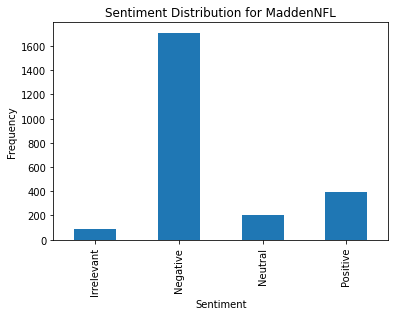

In [61]:
# Assuming 'df' is your DataFrame with headers and 'Game', 'Sentiment' columns
entity_sentiments = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Finding the most repeated entity
most_repeated_entity = entity_sentiments.sum(axis=1).idxmax()

# Plotting sentiment distribution for the most repeated entity
most_repeated_entity_sentiments = entity_sentiments.loc[most_repeated_entity]
most_repeated_entity_sentiments.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title(f'Sentiment Distribution for {most_repeated_entity}')
plt.show()
